## Geopandas: Mapping the Leipzigs Neighborhoods.

#### Neighborhoods and City Planning
Neighborhoods are the building blocks of bigger cities.

#### Statistical Planning Areas (SPAs)
SPAs provide that formal structure on a neighborhood, and allow City planners to have a framework for data collection and analysis. This helps identify a neighborhoods strengths and weaknesses, and allows for an effective framework for government and private sector investment.

#### Accessing the GeoJSON
The City of Cleveland Open Data has made a GeoJSON file available (click on the download button to access the data formats):
https://static.leipzig.de/

In [1]:
import pandas as pd
import geopandas

file = 'leipzig2.geojson'
leipzig = geopandas.read_file(file)

print(leipzig.head())

   FID SBZ     Name                                           geometry
0    0   0    Mitte  POLYGON ((315492.444 5692799.221, 315487.146 5...
1    1   1  Nordost  POLYGON ((321785.688 5698622.999, 321737.425 5...
2    2   2      Ost  POLYGON ((323787.583 5693806.306, 323772.446 5...
3    3   3   Südost  POLYGON ((318994.613 5690764.446, 318983.342 5...
4    4   4      Süd  POLYGON ((316357.432 5689462.591, 316345.585 5...


In [2]:
neighbourhoods = leipzig.Name.unique()
print(neighbourhoods)

['Mitte' 'Nordost' 'Ost' 'Südost' 'Süd' 'Südwest' 'West' 'Alt-West'
 'Nordwest' 'Nord']


#### Plotting Neighborhood Boundaries
Taking the boilerplate code from a previous article it is easy to quickly draw neighborhood boundaries.

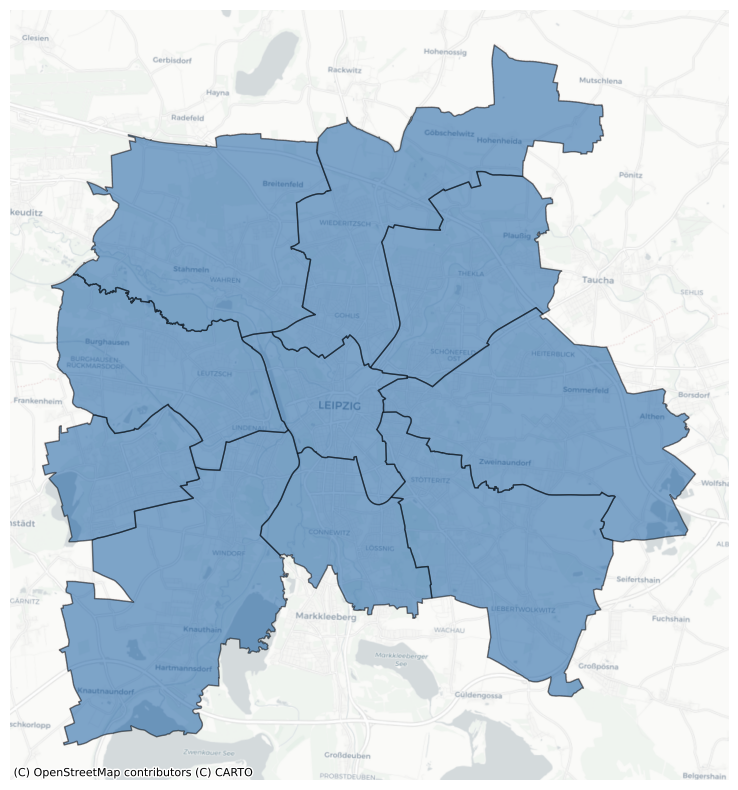

In [3]:

### Pip install contextily if not on your system
### !pip install contextily

import contextily as cx
import matplotlib.pyplot as plt

cleveland_neighborhoods = leipzig.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed

leipzig.plot(ax=ax,
                         facecolor='#024F9A',
                         edgecolor='black',
                         linewidth=1,
                         alpha=.5)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron,
                crs=leipzig.crs.to_string(),
                zoom=12)

ax.set_axis_off()
plt.show()

To add neighborhood labels we can add a piece of code to the above block at line 14.

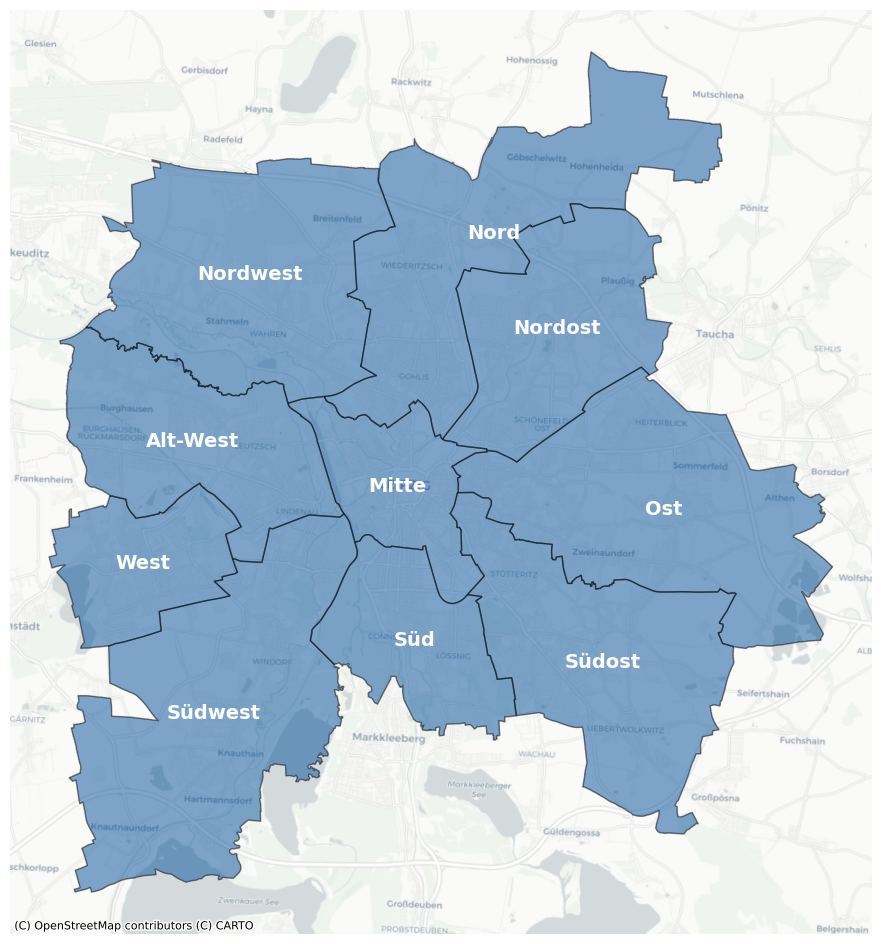

In [7]:

fig, ax = plt.subplots(figsize=(12, 12))

leipzig.plot(ax=ax,
                            facecolor='#024F9A',
                            edgecolor='black',
                            linewidth=1,
                            alpha=.5)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron,
                crs=leipzig.crs.to_string(),
                zoom=12)

### Added this code block
for idx, row in leipzig.iterrows():
     centroid = row['geometry'].centroid
     ax.text(centroid.x, centroid.y, row['Name'],
             ha='center', va='center', fontsize=14, color='white', weight='bold')
     
ax.set_axis_off()
plt.show()

Some of these labels look good, others, not so much, so let’s make a few tweaks to the code to improve our map.

The first thing I want to do is to make one word per line so the long neighborhood names don’t spill over their boundaries.

In [8]:
temp_column = cleveland_neighborhoods.Name
temp_column1 = temp_column.str.replace('-', '-\n')
leipzig['Name'] = temp_column1.str.replace(' ', '\n')
print(leipzig['Name'].head())

0      Mitte
1    Nordost
2        Ost
3     Südost
4        Süd
Name: Name, dtype: object


Now I will create a new function add_centroid_coordsthat calculates the centroids and adds that column to my data frame. Then I am going to find the Cuyahoga Valley label and move it up and to the right. The Downtown label will be moved straight down.

In [ ]:
def add_centroid_coords(row):
    """Calculates and adds centroid coordinates as a tuple to a new column."""
    centroid = row.geometry.centroid
    return (centroid.x, centroid.y)

# Preprocess the DataFrame
leipzig['centroid_coords'] = leipzig.apply(add_centroid_coords, axis=1)

fig, ax = plt.subplots(figsize=(12, 12)) 

cleveland_neighborhoods.plot(ax=ax,
                            facecolor='#012F5E',
                            edgecolor='black',
                            linewidth=1,
                            alpha=.5)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron,
                crs=leipzig.crs.to_string(),
                zoom=12)

for idx, row in cleveland_neighborhoods.iterrows():
    centroid = row['centroid_coords'] 

    # Adjust "Cuyahoga Valley" name
    if row['Name'] == 'Cuyahoga\nValley':
        centroid = (centroid[0] + 950, centroid[1] + 850) # Adjust coordinates up and to the right.

    # Adjust "Downtown" name
    if row['SPANM'] == 'Downtown':
        centroid = (centroid[0], centroid[1] - 500) # Adjust coordinates down

    ax.text(centroid[0], centroid[1], row['SPANM'],  
            ha='center', va='center', fontsize=6)  


ax.set_axis_off()
plt.show()